In [ ]:
# https://github.com/Abhishek-Iyer1/emotion-classifcation-eeg-seed-ensemble

Organizing the EEG data from all the trials in one 'data' array

In [1]:
import numpy as np
import pandas as pd
import os
from scipy.io import loadmat
import scipy.io as sio
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt


In [2]:
# Identifying the maximum data points from all the trials

# Path to the folder containing the mat files
mat_folder = "E:/STUDY/Publications/Thesis/Brain Emotion Detection/Dataset/Practice with datasets/Seed/Preprocessed_EEG"

# Initialize arrays to store data sizes and maximum size
sizes = []
max_vals = 0

# Loop through all files in the folder
for filename in os.listdir(mat_folder):
    if filename.endswith(".mat"):
        mat_file = os.path.join(mat_folder, filename)
        loaded_data = loadmat(mat_file)
        # Loop through the variables in the loaded file
        for var_name in loaded_data:
            var_data = loaded_data[var_name]
            if isinstance(var_data, np.ndarray) and len(var_data.shape) == 2:
                sizes.append(var_data.shape[1])
                max_vals = max(max_vals, var_data.shape[1])

print(max_vals)

53001


In [3]:
# Initialize a 3D array to store EEG data
data = np.zeros((30, 62, max_vals))

In [4]:
# Loop through all files and variables again to load data
#filling the data array with all trials, channel and each channel points
index = 0
for filename in os.listdir(mat_folder):
    if filename.endswith(".mat"):
        mat_file = os.path.join(mat_folder, filename)
        loaded_data = loadmat(mat_file)
        
        for var_name in loaded_data:
            var_data = loaded_data[var_name]
            if isinstance(var_data, np.ndarray) and len(var_data.shape) == 2:
                num_channels = var_data.shape[0]
                num_elements = var_data.shape[1]
                data[index, :num_channels, :num_elements] = var_data
                index += 1

# Print the shape of the data array
print("Shape of data array:", data.shape)

Shape of data array: (30, 62, 53001)


Checking if the data array is correct or not with the main files

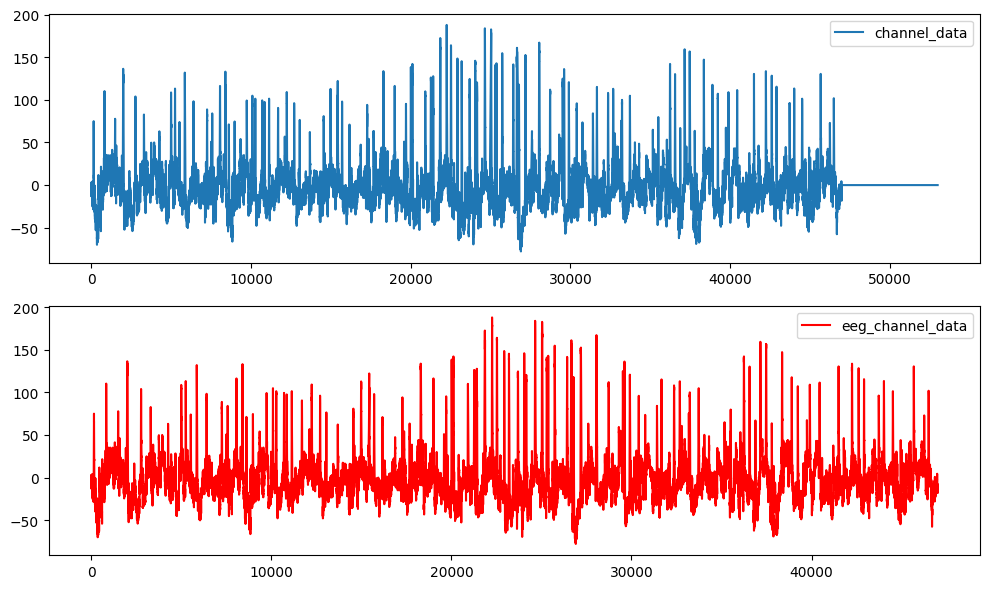

 Mean Square errorr ======= 0.0


In [5]:
from sklearn.metrics import mean_squared_error

# Choose a channel and trial
selected_channel = 1
selected_trial = 15

#From the data array
channel_data = data[selected_trial, selected_channel, :]


#From EEG file for testing
file_path = 'E:/STUDY/Publications/Thesis/Brain Emotion Detection/Dataset/Practice with datasets/Seed/Preprocessed_EEG/2_20140404.mat'
mat_data = sio.loadmat(file_path)

eeg_trial_data = mat_data['jl_eeg1']

eeg_channel_data = eeg_trial_data[selected_channel, :]

# Create a time vector based on the number of data points and sampling rate
sampling_rate = 200  
time_vector = np.arange(len(channel_data)) / sampling_rate

# Create a figure with two subplots
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)  # First subplot
plt.plot(channel_data, label='channel_data')
plt.legend()

plt.subplot(2, 1, 2)  # Second subplot
plt.plot(eeg_channel_data, label='eeg_channel_data', color='red')
plt.legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


#Checking the mean square error of two channel
min_length = min(len(channel_data), len(eeg_channel_data))
mse = mean_squared_error(channel_data[:min_length], eeg_channel_data[:min_length])
print(" Mean Square errorr ======= " + str(mse))
